3. Support vector machines.

Exercise 4: Various kernels

In [1]:
###    Import necessary classes
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd

In [2]:
###    Read csv file and set X and Y for training.
csv = pd.read_csv("dist.csv",header=None,delimiter=";")
csv = np.array(csv.iloc[:,:])
X = csv[:,:2]
Y = csv[:,2]

In [3]:
###    Read csv file and set X and Y for validation.
csv_val = pd.read_csv("dist_val.csv",header=None,delimiter=";")
csv_val = np.array(csv_val.iloc[:,:])
X_val = csv_val[:,:2]
Y_val = csv_val[:,2]

A. Kernel = "linear"

part (1): tune the parameter (C).

In [4]:
C = [1,0.1,0.05,0.02,0.01,0.001]
val_accuracy=[]
for i in range(len(C)):
    model=svm.SVC(kernel="linear",C=C[i])
    clf=model.fit(X,Y)
    accuracy=clf.score(X_val,Y_val)
    print(f"The validation accuracy for C = {C[i]} is {accuracy}.")
    val_accuracy.append(accuracy)
for i in range(len(val_accuracy)):
    if val_accuracy[i] == max(val_accuracy):
        C_chosen = C[i]
print(f"The chosen C number for linear kernel is: {C_chosen}.")

The validation accuracy for C = 1 is 0.88275.
The validation accuracy for C = 0.1 is 0.88345.
The validation accuracy for C = 0.05 is 0.88135.
The validation accuracy for C = 0.02 is 0.87755.
The validation accuracy for C = 0.01 is 0.8756.
The validation accuracy for C = 0.001 is 0.7809.
The chosen C number for linear kernel is: 0.1.


part (2): plot the decision boundary.

In [5]:
###    first we define the function to plot the decision boundary
def decision_boundary_with_original_bound(Model,kernel):
    plt.figure()
    COLOR = []
    for i in range(len(Y)):
        if Y[i] == 1:
            COLOR.append("#FF0000")
        else:
            COLOR.append("#0000FF")
    plt.scatter(x=X[:,0],y=X[:,1],c=COLOR,s=2.5)
    x3s = np.arange(-6,3.94,10**-5)
    y3s = 0.071*(174-22*x3s-((23123-6144*x3s+288*((x3s)**2))**(1/2)))
    plt.plot(x3s,y3s,linewidth = 1,color="black")
    x4s = np.arange(3.94,10,10**-5)
    y4s = 0.5*(18-2*x4s-((-724+256*x4s-16*((x4s)**2))**(1/2)))
    plt.plot(x4s,y4s,linewidth = 1,color="black")
    model = Model
    model.fit(X,Y)
    x1_min = -6
    x1_max = 10
    x2_min = -10
    x2_max = 10
    x1s = np.linspace(x1_min,x1_max,200)
    x2s = np.linspace(x2_min,x2_max,200)
    x1,x2 = np.meshgrid(x1s,x2s)
    X_point = np.c_[x1.ravel(),x2.ravel()]
    y_pred = model.predict(X_point).reshape(x1.shape)
    plt.title(f"The decision boundary plot for {kernel} with optimized chosen parameters.")
    plt.contourf(x1,x2,y_pred, cmap='jet',alpha=0.5)
    plt.show()

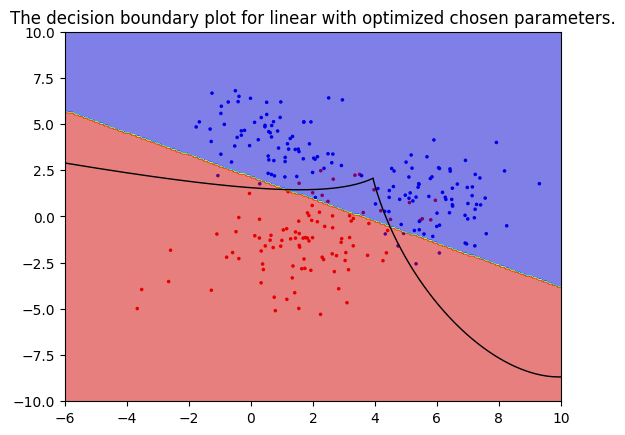

In [6]:
###    plot the decision boundary with C = C_chosen = 0.1 in kernel = "linear"
Kernel = "linear"
Model = svm.SVC(kernel=Kernel,C=C_chosen)
decision_boundary_with_original_bound(Model,Kernel)

B. Kernel = "rbf"

part (1): tune the parameter (C,gamma).

In [7]:
gamma=['auto','scale',0.1,0.002,0.001]
val_accuracy=[]
index=[]
for i in range(len(C)):
    for j in range(len(gamma)):
        model=svm.SVC(kernel="rbf",C=C[i],gamma=gamma[j])
        clf=model.fit(X,Y)
        accuracy=clf.score(X_val,Y_val)
        print(f"The validation accuracy for C = {C[i]}, gamma = {gamma[j]} is {accuracy}.")
        val_accuracy.append(accuracy)
        Index=(i,j)
        index.append(Index)
for i in range(len(val_accuracy)):
    if val_accuracy[i] == max(val_accuracy):
        index = index[i]
C_chosen = C[index[0]]
gamma_chosen = gamma[index[1]]
print(f"The chosen C number for rbf kernel is: {C_chosen}, the chosen gamma number for rbf kernel is {gamma_chosen}.")

The validation accuracy for C = 1, gamma = auto is 0.90905.
The validation accuracy for C = 1, gamma = scale is 0.91035.
The validation accuracy for C = 1, gamma = 0.1 is 0.9109.
The validation accuracy for C = 1, gamma = 0.002 is 0.8726.
The validation accuracy for C = 1, gamma = 0.001 is 0.8493.
The validation accuracy for C = 0.1, gamma = auto is 0.87755.
The validation accuracy for C = 0.1, gamma = scale is 0.8997.
The validation accuracy for C = 0.1, gamma = 0.1 is 0.90125.
The validation accuracy for C = 0.1, gamma = 0.002 is 0.51845.
The validation accuracy for C = 0.1, gamma = 0.001 is 0.5.
The validation accuracy for C = 0.05, gamma = auto is 0.78255.
The validation accuracy for C = 0.05, gamma = scale is 0.89095.
The validation accuracy for C = 0.05, gamma = 0.1 is 0.88965.
The validation accuracy for C = 0.05, gamma = 0.002 is 0.5.
The validation accuracy for C = 0.05, gamma = 0.001 is 0.5.
The validation accuracy for C = 0.02, gamma = auto is 0.5.
The validation accuracy fo

part (2): plot the decision boundary.

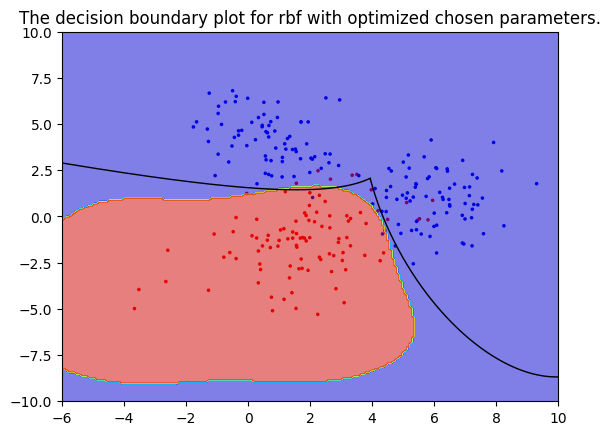

In [8]:
###    plot the decision boundary with C = C_chosen = 1, gamma = gamma_chosen = 0.1 in kernel = "rbf"
Kernel = "rbf"
Model = svm.SVC(kernel=Kernel,C=C_chosen,gamma=gamma_chosen)
decision_boundary_with_original_bound(Model,Kernel)

C. Kernel = "poly"

part (1): tune the parameter (C,d,gamma).

In [9]:
d = [2,3,4,5,6]
val_accuracy=[]
index=[]
for i in range(len(C)):
    for j in range(len(gamma)):
        for k in range(len(d)):
            model=svm.SVC(kernel="poly",C=C[i],gamma=gamma[j],degree=d[k])
            clf=model.fit(X,Y)
            accuracy=clf.score(X_val,Y_val)
            print(f"The validation accuracy for C = {C[i]}, gamma = {gamma[j]}, d = {d[k]} is {accuracy}.")
            val_accuracy.append(accuracy)
            Index=(i,j,k)
            index.append(Index)
for i in range(len(val_accuracy)):
    if val_accuracy[i] == max(val_accuracy):
        index = index[i]
C_chosen = C[index[0]]
gamma_chosen = gamma[index[1]]
d_chosen = d[index[2]]
print(f"The chosen C number for poly kernel is: {C_chosen}, the chosen gamma number for poly kernel is {gamma_chosen}, the chosen deggree for poly kernel is {d_chosen}.")

The validation accuracy for C = 1, gamma = auto, d = 2 is 0.8598.
The validation accuracy for C = 1, gamma = auto, d = 3 is 0.91475.
The validation accuracy for C = 1, gamma = auto, d = 4 is 0.8536.
The validation accuracy for C = 1, gamma = auto, d = 5 is 0.89635.
The validation accuracy for C = 1, gamma = auto, d = 6 is 0.82015.
The validation accuracy for C = 1, gamma = scale, d = 2 is 0.85845.
The validation accuracy for C = 1, gamma = scale, d = 3 is 0.9078.
The validation accuracy for C = 1, gamma = scale, d = 4 is 0.85355.
The validation accuracy for C = 1, gamma = scale, d = 5 is 0.8958.
The validation accuracy for C = 1, gamma = scale, d = 6 is 0.8097.
The validation accuracy for C = 1, gamma = 0.1, d = 2 is 0.85945.
The validation accuracy for C = 1, gamma = 0.1, d = 3 is 0.91385.
The validation accuracy for C = 1, gamma = 0.1, d = 4 is 0.8526.
The validation accuracy for C = 1, gamma = 0.1, d = 5 is 0.9064.
The validation accuracy for C = 1, gamma = 0.1, d = 6 is 0.81885.
Th

part (2): plot the decision boundary

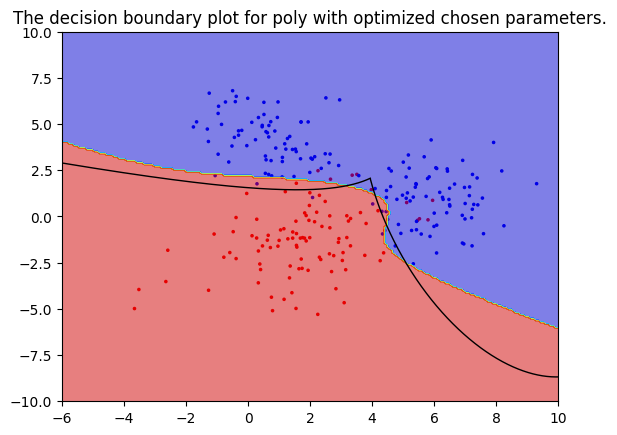

In [10]:
###    plot the decision boundary with C = C_chosen = 0.05, gamma = gamma_chosen = auto, d = d_chosen = 3 in kernel = "poly"
Kernel = "poly"
Model = svm.SVC(kernel=Kernel,C=C_chosen,gamma=gamma_chosen,degree=d_chosen)
decision_boundary_with_original_bound(Model,Kernel)